# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-14 02:03:04--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-14 02:03:04--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [4]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [ ]:
# Resumen del conjunto de datos

# Contar la cantidad de tweets por etiqueta


In [ ]:
data.shape
data.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [ ]:
data["Contents"].head()

,Contents
0,@chumeltorres ya cabrón! sin tí se reciben las...
1,¿alguien es tan amable de ir a hacerme la comp...
2,"@jenniferduquee hahaha, si está rico, nadamas ..."
3,@evagelcot donde lo ves!!? es mi programa favo...
4,como siempre mi tortilla triunfa mas que otros...


In [ ]:
data['Label'].value_counts()

,count
Label,
non-biased,1596
biased,318


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

los tweets biased representan un muy bajo porcentaje menos del 80%, en cambio los tweets non biased son un poco mas del 80%, esto quiere decir que esta muy desbalanceado, el porcentaje mas alto lo tomaria como el "real"

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [ ]:
## Cree una funcion limpiar texto

In [ ]:
data['cleaned_contents'] = data['Contents'].apply(clean_text)

In [ ]:
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Eliminar stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)


In [ ]:
clean_text(data['Contents'][0])

'chumeltorres cabrn t reciben noticias colchoncito puro chingadazo extraoreirconchumel'

## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [ ]:
def count_words(text):
    # Dividir el texto en palabras
    words = text.split()
    return Counter(words)

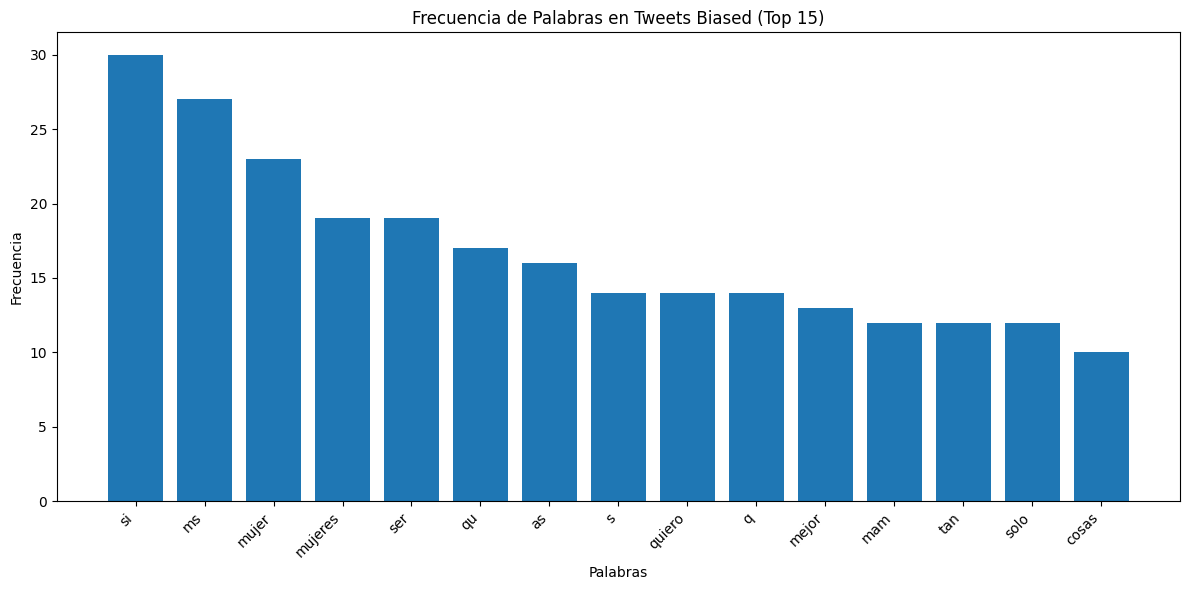

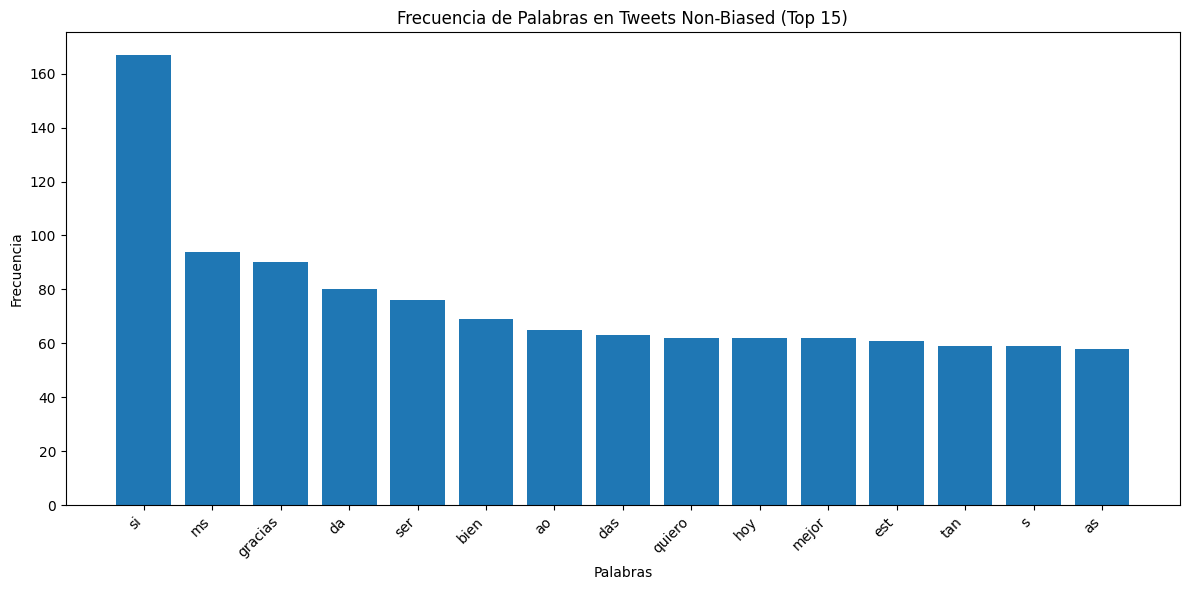

In [ ]:
# Contar palabras para tweets 'biased'
biased_tweets = ' '.join(data[data['Label'] == 'biased']['cleaned_contents'])
frecuency_biased = count_words(biased_tweets)

# Contar palabras para tweets 'non-biased'
non_biased_tweets = ' '.join(data[data['Label'] == 'non-biased']['cleaned_contents'])
frecuency_non_biased = count_words(non_biased_tweets)

# Visualización de frecuencia de palabras (top 15)
plt.figure(figsize=(12, 6))
plt.bar([word for word, count in frecuency_biased.most_common(15)], [count for word, count in frecuency_biased.most_common(15)])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Palabras en Tweets Biased (Top 15)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar([word for word, count in frecuency_non_biased.most_common(15)], [count for word, count in frecuency_non_biased.most_common(15)])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Palabras en Tweets Non-Biased (Top 15)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

en los tweets biased las palabras mas comunes son: si, ms, mujer, mujeres. a difrencia de los non - biased es si, ms, gracias

el primero es mas como de genero, tiene que ver con la identridad y el segundo como de la cotidianidad mas normal  

podrian identificar las palabras, sesgar como estas opiniones para identificar temas y asi saber la tendencia para aplicarlas en campañas o publicidad

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [ ]:
df_biased = data[data['Label'] == 'biased']
df_non_biased = data[data['Label'] == 'non-biased']

In [ ]:
dfg = df_biased["cleaned_contents"]
dfg = dfg.str.cat(sep=' ')
dfg = dfg.split()
dfg = Counter(dfg)
dfg = dict(dfg)
dfg = pd.DataFrame.from_dict(dfg, orient='index').reset_index()
dfg.columns = ['word', 'count']
dfg = dfg.sort_values(by='count', ascending=False)
dfg = dfg.head(100)

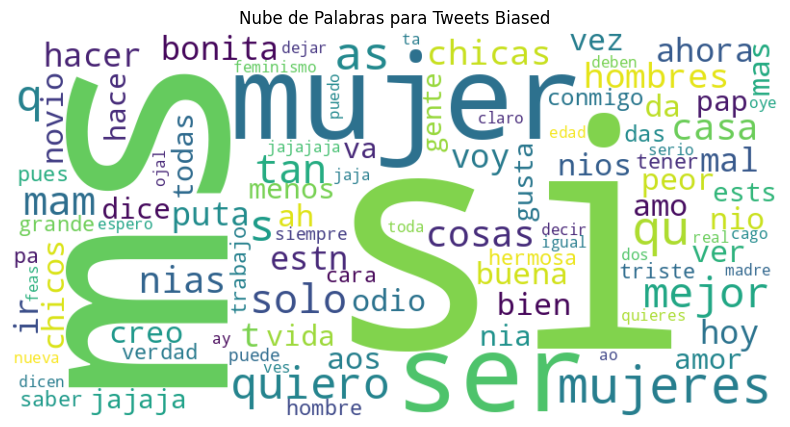

In [ ]:
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400
                      , background_color='white'
                      , colormap='viridis'
                      , max_words=100
                      , contour_width=3
                      , contour_color='steelblue'
                      ).generate_from_frequencies(dfg.set_index('word').to_dict()['count'])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Tweets Biased')
plt.show()


## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

1. Este análisis te muestra qué temas son delicados y qué tipo de lenguaje puede sonar sesgado o estereotipado. Con eso, la marca puede ajustar mejor su forma de hablar, evitar frases que suenen prejuiciosas y crear mensajes más inclusivos y alineados con valores de diversidad y respeto

2. Si se nota que hay sesgo, la marca podría:

- Reforzar mensajes que promuevan igualdad y representación real.

- Sacar campañas que eduquen o cuestionen ciertos estereotipos.

- Estar más pendiente de las interacciones para responder con empatía y evitar una crisis de imagen.

- Ajustar las piezas creativas o el público al que va dirigida la campaña para que no haya mensajes que se puedan malinterpretar como ofensivos o discriminatorios.

3. Cambios del lenguaje y del sesgo a lo largo del tiempo.

- Diferencias entre géneros, regiones o grupos de usuarios.

- Relación entre el sesgo y el sentimiento (positivo/negativo).

- Temas emergentes que puedan afectar la reputación de la marca o abrir nuevas oportunidades comerciales.